# Santander - CS 795 - Project 1

    Peter G. Mavronicolas
    Old Dominion University
    CS 795, Spring 2023
    Dr. Yaohang Li

## Data Processing Methods

### To begin, all necessary libraries were imported. The file *train.csv* file was read and asigned a name (satisfaction). The data was then viewed by calling the *head()* function. Next, the *info()* function was called to identify the number of columns (371) and rows (76020). The commmand *satisfaction.isnull().sum()*. 

### Pre-proceesing of the data did not seem necessary for the *TARGET* column since the values were already set to 0 for satified and 1 for unsatisified. For the sake of learning and applying the technique for future projects, it is important to note the process. It is also important to not that despite satified(0) being less than unsatisified(1), switching the two variables in not necessary since we are dealing with classifiers instead of regressions.

### Next, *LabelEncoder()* was assigned the name *label_quality*. The function *fit_transform()* was the applied to the *TARGET* column in *satisfaction['TARGET']*. the *value_counts()* function was applied to show a count of satisfied vs. unsatisfied customers. Finally, using the seaborn library, the data was visualized with the command *sns.countplot()* function.

In [23]:
#from https://www.youtube.com/watch?v=0Lt9w-BxKFQ
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
#models
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm 
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier #Multi-layer Percepitron

from sklearn import datasets

#from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

from sklearn.datasets import make_classification
from sklearn.inspection import permutation_importance
from scipy.stats import chisquare
from scipy.stats import chi2_contingency, pearsonr

In [2]:
satisfaction = pd.read_csv('../data/train.csv')
sat_test = pd.read_csv('../data/test.csv')

In [3]:
satisfaction.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [4]:
satisfaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [5]:
satisfaction.isnull().sum()

ID                         0
var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
                          ..
saldo_medio_var44_hace3    0
saldo_medio_var44_ult1     0
saldo_medio_var44_ult3     0
var38                      0
TARGET                     0
Length: 371, dtype: int64

In [6]:
#Preprocessing Data
bins = (0, .5, 1)
group_names =['satisfied', 'unsatisfied']
satisfaction['TARGET'] = pd.cut(satisfaction['TARGET'], bins = bins, labels = group_names)
satisfaction['TARGET'].unique()
#this section not necessary since data was already preprocessed. I left unsatisfied as 1 to keep consistent with the directions despite sat < unsat

[NaN, 'unsatisfied']
Categories (2, object): ['satisfied' < 'unsatisfied']

In [7]:
label_quality = LabelEncoder()

In [8]:
satisfaction['TARGET'] = label_quality.fit_transform(satisfaction['TARGET'])

In [9]:
satisfaction['TARGET'].value_counts()

1    73012
0     3008
Name: TARGET, dtype: int64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TARGET', ylabel='count'>

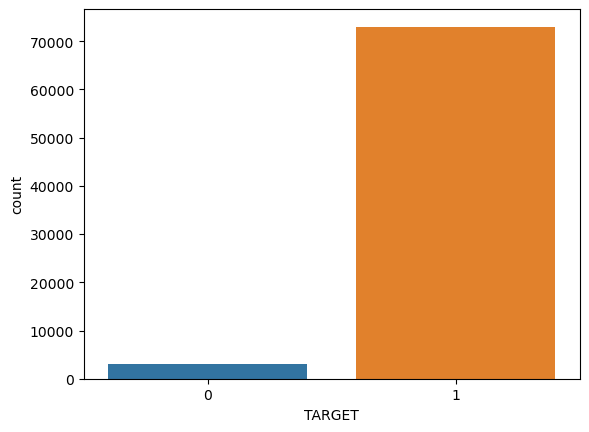

In [10]:
sns.countplot(satisfaction['TARGET'])

## Feature Selections Strategy
Both the response and feature variables were set to *TARGET*. The data was then trained and split. Finally, standard scaling was applied for optimized results.

In [11]:
# Separate Dataset as response variable and feature variable
X = satisfaction.drop('TARGET', axis = 1)
y = satisfaction['TARGET']

In [12]:
#Train and test splitting data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [13]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
X_train[:10]

array([[-0.78546492,  0.03847964, -0.7882233 , ..., -0.01788388,
        -0.01885542, -0.22560194],
       [ 1.26399856,  0.03847964,  1.37702506, ..., -0.01788388,
        -0.01885542, -0.12652341],
       [ 0.34770634,  0.03847964,  0.83571297, ..., -0.01788388,
        -0.01885542, -0.0312971 ],
       ...,
       [-0.63897685,  0.03847964, -0.7882233 , ..., -0.01788388,
        -0.01885542,  0.15995524],
       [ 1.08000973,  0.03847964,  0.06240999, ..., -0.01788388,
        -0.01885542, -0.00982077],
       [-0.68478575,  0.03847964, -0.7882233 , ..., -0.01788388,
        -0.01885542, -0.33371947]])

## Machine Learning Models
The models that were used are *Random Forest Classifier*, *SVM*, *Support Vector Model Classifier(Non-linear)*, *Chi Square* and *Pearson Correlation*.

### Random Forest Classifier

In [15]:
rfc = RandomForestClassifier(n_estimators=200) #builds 200 trees
rfc.fit(X_train, y_train) #fit data to rfc
pred_rfc = rfc.predict(X_test)  #prediction

In [16]:
pred_rfc[:100]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [17]:
X_test[:20]

array([[ 0.57264244,  0.03847964,  0.91304327, ..., -0.01788388,
        -0.01885542, -0.21519775],
       [-1.49300366,  0.03847964,  2.07299775, ..., -0.01788388,
        -0.01885542,  0.26523201],
       [-0.72956755,  0.03847964, -0.4789021 , ..., -0.01788388,
        -0.01885542, -0.18926738],
       ...,
       [-1.42692654,  0.03847964, -0.710893  , ..., -0.01788388,
        -0.01885542, -0.40012787],
       [-1.44235594,  0.03847964, -0.32424151, ..., -0.01788388,
        -0.01885542,  0.2510771 ],
       [ 0.64362684,  0.03847964,  0.52639178, ..., -0.01788388,
        -0.01885542, -0.38302542]])

In [18]:
# prints array of columns
column_headers = list(satisfaction.columns.values)

column_headers

['ID',
 'var3',
 'var15',
 'imp_ent_var16_ult1',
 'imp_op_var39_comer_ult1',
 'imp_op_var39_comer_ult3',
 'imp_op_var40_comer_ult1',
 'imp_op_var40_comer_ult3',
 'imp_op_var40_efect_ult1',
 'imp_op_var40_efect_ult3',
 'imp_op_var40_ult1',
 'imp_op_var41_comer_ult1',
 'imp_op_var41_comer_ult3',
 'imp_op_var41_efect_ult1',
 'imp_op_var41_efect_ult3',
 'imp_op_var41_ult1',
 'imp_op_var39_efect_ult1',
 'imp_op_var39_efect_ult3',
 'imp_op_var39_ult1',
 'imp_sal_var16_ult1',
 'ind_var1_0',
 'ind_var1',
 'ind_var2_0',
 'ind_var2',
 'ind_var5_0',
 'ind_var5',
 'ind_var6_0',
 'ind_var6',
 'ind_var8_0',
 'ind_var8',
 'ind_var12_0',
 'ind_var12',
 'ind_var13_0',
 'ind_var13_corto_0',
 'ind_var13_corto',
 'ind_var13_largo_0',
 'ind_var13_largo',
 'ind_var13_medio_0',
 'ind_var13_medio',
 'ind_var13',
 'ind_var14_0',
 'ind_var14',
 'ind_var17_0',
 'ind_var17',
 'ind_var18_0',
 'ind_var18',
 'ind_var19',
 'ind_var20_0',
 'ind_var20',
 'ind_var24_0',
 'ind_var24',
 'ind_var25_cte',
 'ind_var26_0',
 '

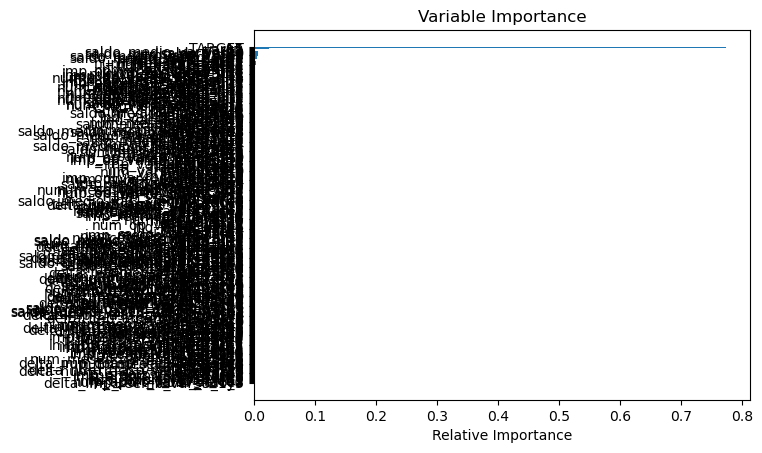

In [19]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=10,
                                random_state=1)

features = np.array(column_headers)
clf = RandomForestClassifier()
clf.fit(satisfaction[features], satisfaction['TARGET'])

# from the calculated importances, order them from most to least important
# and make a barplot so we can visualize what is/isn't important
importances = clf.feature_importances_
sorted_idx = np.argsort(importances)

padding = np.arange(len(features)) 

plt.barh(padding, importances[sorted_idx], align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()


In [20]:
from sklearn.ensemble import RandomForestClassifier

forest.fit(X_train, y_train.values.ravel())

importances = forest.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]

feat_labels = satisfaction.columns[1:]
print('Feature Importances')
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

Feature Importances
 1) var3                           0.245666
 2) TARGET                         0.203228
 3) imp_ent_var16_ult1             0.156903
 4) saldo_medio_var8_hace2         0.023867
 5) saldo_medio_var5_ult1          0.019860
 6) saldo_var31                    0.018997
 7) saldo_var2_ult1                0.018487
 8) num_med_var22_ult3             0.014969
 9) saldo_var44                    0.014777
10) num_var45_hace3                0.013877
11) num_var45_ult1                 0.013528
12) saldo_medio_var5_hace3         0.012087
13) saldo_medio_var5_ult3          0.011260
14) num_var22_ult1                 0.010053
15) num_meses_var5_ult3            0.009060
16) num_var22_hace3                0.008834
17) saldo_var6                     0.008344
18) num_var45_ult3                 0.008266
19) delta_imp_amort_var18_1y3      0.007859
20) num_var37_med_ult2             0.006199
21) ind_var31_0                    0.006164
22) num_var22_ult3                 0.005917
23) num_mese

### Chi Square

In [21]:
field1 = satisfaction['TARGET']
field2  = satisfaction['var3']

myCrosstable = pd.crosstab(field1, field2)
myCrosstable


chiVal, pVal, df, exp = chi2_contingency(myCrosstable)
chiVal, pVal, df, exp

(69.58270840793723,
 1.0,
 207,
 array([[4.58995001e+00, 2.96764009e+00, 4.15469613e+00, 2.93460037e+03,
         4.27340174e+00, 3.40289398e+00, 2.49281768e+00, 3.24461984e+00,
         3.83814786e+00, 5.46045777e+00, 4.35253881e+00, 2.84893449e+00,
         2.61152328e+00, 3.36332544e+00, 3.87771639e+00, 2.41368061e+00,
         1.34533018e+00, 3.56116811e-01, 2.76979742e-01, 3.95685346e-01,
         1.18705604e-01, 2.37411208e-01, 1.58274138e-01, 1.97842673e-01,
         2.76979742e-01, 1.97842673e-01, 2.37411208e-01, 1.18705604e-01,
         1.58274138e-01, 1.58274138e-01, 1.18705604e-01, 1.97842673e-01,
         2.37411208e-01, 7.91370692e-02, 1.18705604e-01, 7.91370692e-02,
         7.91370692e-02, 1.58274138e-01, 2.37411208e-01, 3.95685346e-02,
         3.95685346e-02, 7.91370692e-02, 1.18705604e-01, 7.91370692e-02,
         7.91370692e-02, 1.58274138e-01, 7.91370692e-02, 1.58274138e-01,
         1.18705604e-01, 7.91370692e-02, 7.91370692e-02, 7.91370692e-02,
         1.18705604

## Pearson Correlation

In [24]:
# Method 1
#newDf = satisfaction[['var3', 'TARGET']].dropna()
#newDf.head()
#newDf.corr()

# Method 2
#npArr1 = np.array(satisfaction['var3'])
#npArr2 = np.array(satisfaction['TARGET'])
#np.corrcoef(npArr1,npArr2)

# Method 3
pearsonr(satisfaction['var3'],satisfaction['TARGET'] )



PearsonRResult(statistic=-0.00447479817553666, pvalue=0.21729051464867472)

# Support Vector Model Classifier (Non-linear SVM)

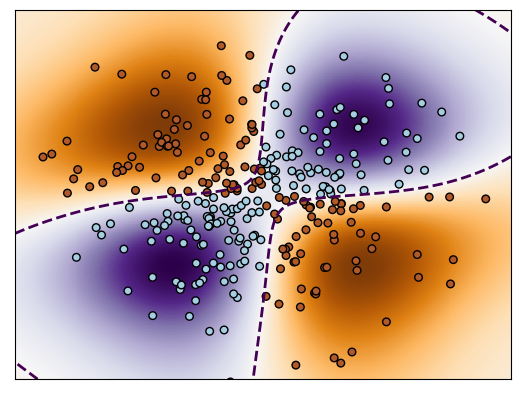

In [25]:
xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

# fit the model
clf = svm.NuSVC(gamma="auto")
clf.fit(X, Y)

# plot the decision function for each datapoint on the grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect="auto",
    origin="lower",
    cmap=plt.cm.PuOr_r,
)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2, linestyles="dashed")
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired, edgecolors="k")
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()


# SVM

In [26]:
clf = svm.SVC()
#clf.fit(X_train, y_train)
clf.fit(X, Y)
pred_clf = clf.predict(X)

Neural Network

In [27]:
mlpc=MLPClassifier(hidden_layer_sizes=(11,11,11),max_iter=500)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)

## Results
Data visualization was ahieved using Seaborn to plot: *Scatterplot*, *Histogram*, *Barplot*, and *Jointplot*. Results of the confusion matrix is also shown for the Random Forest Classifier and Support Vector Model Classifiers.

### Scatterplot

<AxesSubplot:xlabel='var15', ylabel='var38'>

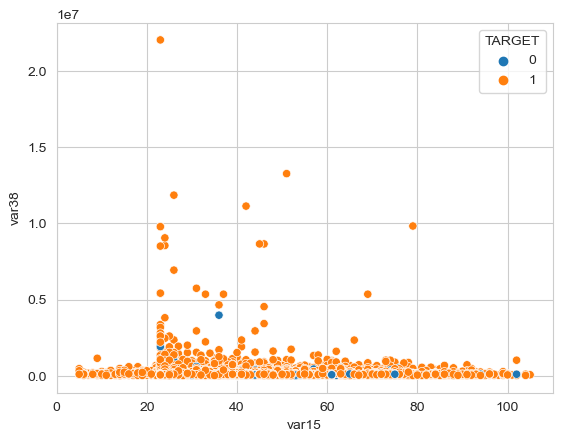

In [28]:
sns.set_style("whitegrid")
sns.scatterplot(x="var15", y="var38", data = satisfaction, hue = 'TARGET')

### Histogram

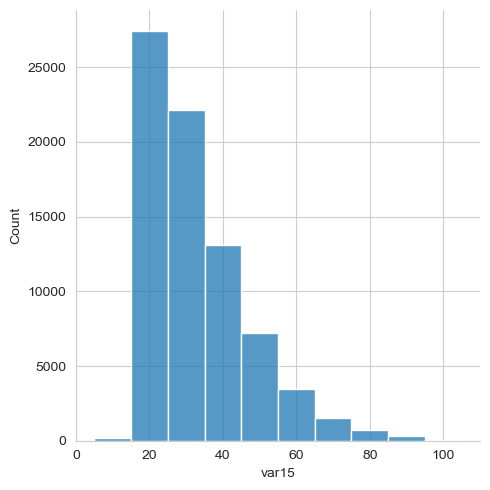

In [29]:
sns.displot(satisfaction['var15'], kde = False, bins = 10)

### Barplot

sns.barplot(x=satisfaction['var15'], y =satisfaction['var38'], data=satisfaction, palette = "YlGnBu")

### Jointplot

In [ ]:
sns.jointplot(x="var15", y ="var38", data=satisfaction, kind = "reg")

### The bar chart below shows a comparison between the *0* values, satisfied and *1* values, unsatisfied. It's to no surprise that Santander requested to have a report put together identifying the features that lead to unsatisfied customers.

![alt text](Satisfaction.jpg "Title")

![alt text](Spreadsheet.jpg "Title")

![alt text](Normalized.jpg "Title")

![alt text](Importance.jpg "Title2")

### The features (column variables) that stood out most in importance is *var3* with an importance value of 0.245666 and *imp_ent_var16_ult1* with an importance value of 0.156903. These are the two features I would advise Santander's leadership team to concentrate on in order to improve customer satisfaction. Thereafter, the remaining features should be addressed in order to improve customer satisfaction.

![alt text](Importance_Rank.jpg "Title")

## Confusion Matrix - Random Forest Classifier
### From left to right we have a true positive (TP) value of 18, Type I error(FP or precision) of 589, Type II error(FN or recall) value of 51 and a true negative (TN) value of 14,546. Calculated, the precision for unsatisfied customers came to 0.96 or 96%.

![alt text](confusion_matrix_rfc.jpg "Title")

## Confusion Matrix - Neural Network
### From left to right we have a true positive (TP) value of 10, Type I error(FP or precision) of 597, Type II error(FN or recall) value of 39 and a true negative (TN) value of 14,558. Calculated, the precision for unsatisfied customers came to 0.96 or 96%.

![alt text](confusion_matrix_nn.jpg "Title")

## Kaggle Ranking

Despite the Santander Kaggle challenge expiring several years ago, I will attempt a late submission and update this section upon arrival of results.

## Works Cited

* 1.13. feature selection. scikit. (n.d.). Retrieved February 13, 2023, from https://scikit-learn.org/stable/modules/feature_selection.html 
* Falco Alexander. (1959, October 1). Delete a column from a pandas DataFrame. Stack Overflow. Retrieved February 13, 2023, from https://stackoverflow.com/questions/13411544/delete-a-column-from-a-pandas-dataframe 
* Mil, Tom. (1967, February). How to determine which features matter the most? Data Science Stack Exchange. Retrieved February 13, 2023, from https://datascience.stackexchange.com/questions/69572/how-to-determine-which-features-matter-the-most 
* Naveen. (2021, August 2). Pandas get column names from DataFrame. Spark By {Examples}. Retrieved February 13, 2023, from https://sparkbyexamples.com/pandas/pandas-get-column-names/#:~:text=You%20can%20get%20the%20column,it%20using%20print()%20statement 
* Non-linear SVM. scikit. (n.d.). Retrieved February 13, 2023, from https://scikit-learn.org/stable/auto_examples/svm/plot_svm_nonlinear.html 
* S, S. (2022, July 11). How to access a row in a dataframe (using pandas). ActiveState. Retrieved February 13, 2023, from https://www.activestate.com/resources/quick-reads/how-to-access-a-row-in-a-dataframe/ 
* Simplilearn. (2018, December 6). Scikit-Learn Tutorial | Machine Learning with scikit-learn | sklearn | python tutorial | Simplilearn. YouTube. Retrieved February 13, 2023, from https://www.youtube.com/watch?v=0Lt9w-BxKFQ 
* Ondrej. (1967, May 1). What is the difference between np.linspace and np.arange? Stack Overflow. Retrieved February 13, 2023, from https://stackoverflow.com/questions/62106028/what-is-the-difference-between-np-linspace-and-np-arange#:~:text=arange%20allow%20you%20to%20define,define%20the%20number%20of%20steps.&text=linspace(0%2C1%2C20,exclusive)%20in%20steps%20of%202 
* Using markdown in Jupyter Notebook. Using Jupyter notebook for writing. (n.d.). Retrieved February 13, 2023, from https://gtribello.github.io/mathNET/assets/notebook-writing.html.
* YouTube. (2022, April 17). Seaborn is the easier matplotlib. YouTube. Retrieved February 13, 2023, from https://www.youtube.com/watch?v=ooqXQ37XHMM 
